In [1]:
# Open the file
with open('msd.res.txt', 'r') as f:
    data = f.readlines()
steps = len(data) # Total number of atoms in the system
print(steps)

502


In [2]:
def get_msd_val(line_number):
    l = data[line_number]
    segments = l.split()
    return float(segments[6])

In [3]:
# Generate 10 sets

sets = []
resetter = 0
subtracter = 0
while (resetter+50) < len(data):
    single_set = []
    for j in range(resetter, resetter+50):
        single_set.append(get_msd_val(j) - subtracter)
    sets.append(single_set)
    resetter = resetter + 10
    subtracter = get_msd_val(resetter)

In [4]:
avg_set = []
for i in range(50):
    summ = 0
    for j in range(len(sets)):
        summ += sets[j][i]
    avg = summ/len(sets)
    avg_set.append(avg)
print(avg_set)

[0.0, 0.024464790195652297, 0.07440877978260856, 0.11606065304347817, 0.15148611717391303, 0.20795338369565217, 0.23206211369565208, 0.2942319967391303, 0.33798285673913037, 0.3682890978260871, 0.4205028260869565, 0.44542961000000014, 0.4940680991304346, 0.5357006589130433, 0.5701575545652174, 0.6260738182608694, 0.6505595089130434, 0.7131132069565216, 0.7556443845652173, 0.788034970434783, 0.8412887600000001, 0.8645436519565225, 0.9151703889130434, 0.9594544632608695, 0.9923363947826089, 1.0501789252173914, 1.0711679752173913, 1.134682640434783, 1.1753264556521739, 1.2087811143478262, 1.263696438260869, 1.2863399513043476, 1.335015377391304, 1.3803812773913047, 1.4081310382608694, 1.4628410665217386, 1.4831666034782607, 1.54956543826087, 1.593208244782609, 1.6262184643478268, 1.678697220869565, 1.700978723043479, 1.7519365143478256, 1.796704216521739, 1.8238716904347823, 1.8809021208695655, 1.9034789360869568, 1.9683117578260876, 2.0142906382608685, 2.0513783556521745]


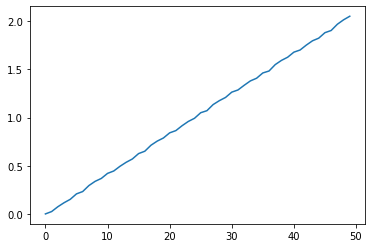

Slope:  0.04192770323950834


In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(avg_set)
plt.show()

s, i = np.polyfit([i for i in range(50)], avg_set, 1)
print("Slope: ", s)